In [1]:
import sys
import torch
from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

import hw5_part1 as hw5
from hw5_part1f import CustomDataset

In [3]:
# env var
mnist_global_mean = 0.1307
mnist_global_stdev = 0.3081

# load custom data
transformer = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((mnist_global_mean,), (mnist_global_stdev,))
    ])

new_dataset = CustomDataset(root_dir='/Users/danielbi/git-repo/FALL23-CS5330/playground/pyTorch/data/SelfWriting', transform=transformer)


In [4]:
data_loader = DataLoader(new_dataset, batch_size=10, shuffle=False)
    
for X, y in data_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape of y: torch.Size([10]) torch.int64


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


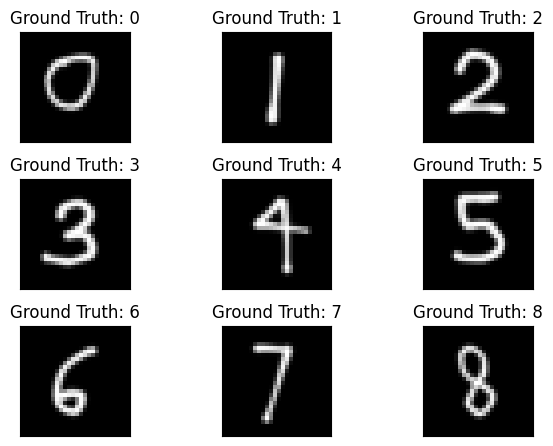

In [5]:
examples = enumerate(data_loader)
batch_idx, (example_data, example_targets) = next(examples)

print(example_targets)

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [6]:
device = hw5.get_device()
model = hw5.NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

Using mps device


<All keys matched successfully>

In [7]:
with torch.no_grad():
    example_data, example_targets = example_data.to(device), example_targets.to(device)
    output = model(example_data)
    probabilities = F.softmax(output, dim=1)
    predicted = output.data.max(1, keepdim=True)[1]
    
    top_p, top_class = probabilities.topk(1, dim = 1)
    
    # print(top_p)
    # print(top_class)
    
    for i in range(len(example_data)):
        print(f"Example {i + 1} - Correct Label: {example_targets[i]}, Predicted Label: {top_class[i].item()}, Probabilities: {top_p[i].item():.2f}")



Example 1 - Correct Label: 0, Predicted Label: 2, Probabilities: 0.79
Example 2 - Correct Label: 1, Predicted Label: 1, Probabilities: 1.00
Example 3 - Correct Label: 2, Predicted Label: 2, Probabilities: 1.00
Example 4 - Correct Label: 3, Predicted Label: 3, Probabilities: 0.98
Example 5 - Correct Label: 4, Predicted Label: 9, Probabilities: 0.60
Example 6 - Correct Label: 5, Predicted Label: 5, Probabilities: 0.87
Example 7 - Correct Label: 6, Predicted Label: 6, Probabilities: 0.84
Example 8 - Correct Label: 7, Predicted Label: 2, Probabilities: 0.46
Example 9 - Correct Label: 8, Predicted Label: 8, Probabilities: 0.68
Example 10 - Correct Label: 9, Predicted Label: 7, Probabilities: 0.34
